---
**Author:** Louis Ziemah
                                                **<center>Abstract</center>**

This project focuses on optimizing the operation of a gold processing plant through a comprehensive analysis of process parameters and their relationships with gold recovery efficiency. Leveraging statistical observations, correlation matrices, and engineering insights, the study identifies key factors influencing recovery and provides practical recommendations for plant optimization. The recommendations encompass maintaining optimal cyanide concentration, particle size optimization, leach feed density management, pH control, grinding process optimization, and considerations for head grade. Real-time monitoring and adherence to environmental and cost considerations are also emphasized. The project aims to guide process engineers and metallurgists in achieving efficient gold recovery while ensuring operational sustainability and cost-effectiveness.

**<center>Project Objective</center>**

Optimize the gold processing plant's performance by analyzing and adjusting key process parameters, enhancing recovery efficiency and ensuring operational sustainability.


**<center>Introduction</center>**

Gold processing plants play a crucial role in extracting gold from ore, and optimizing their operation is vital for maximizing recovery while ensuring operational efficiency and sustainability. This project explores the relationships between various process parameters and gold recovery, offering engineering insights and practical recommendations for plant optimization. By understanding the nuanced correlations observed in the dataset, the project aims to guide plant operators and engineers in making informed decisions to achieve optimal gold recovery under a range of processing conditions. The recommendations encompass a holistic approach, considering factors such as cyanide concentration, particle size, leach feed density, pH control, grinding process, and head grade, with an overarching emphasis on real-time monitoring and environmental considerations for a well-rounded and sustainable gold processing operation.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing a preprocessed dataset
data = pd.read_csv('Data.csv')
data.head()

,Plant Recovery %,Leach feed density %,cN Concentration ppm,Oxygen Concentration ppm,Leach feed Grind %,pH,Head grade g/t
0,96.83,54.28,232,19.70,74.31,11.70,1.38
1,96.61,54.69,256,19.94,73.55,11.72,1.48
2,96.01,55.65,276,18.64,73.35,11.64,1.19
3,96.12,55.13,292,18.95,73.98,11.90,1.29
4,96.99,55.13,310,21.38,76.00,12.00,1.39


In [4]:
data.describe()

,Plant Recovery %,Leach feed density %,cN Concentration ppm,Oxygen Concentration ppm,Leach feed Grind %,pH,Head grade g/t
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,96.992857,57.255238,250.166667,17.168571,77.431190,11.885000,1.251667
std,0.397408,1.564403,38.856783,3.068933,2.002636,0.402694,0.107860
min,95.980000,54.280000,199.000000,11.750000,73.350000,11.240000,1.030000
25%,96.807500,56.127500,220.250000,14.957500,75.737500,11.620000,1.180000
50%,97.010000,57.070000,235.500000,17.515000,77.690000,11.770000,1.255000
75%,97.277500,58.350000,276.000000,19.145000,79.212500,12.122500,1.315000
max,97.630000,60.540000,365.000000,24.790000,80.110000,13.000000,1.520000


In summary, the typical values and variability within the data vary across different parameters. Some parameters, such as Recovery % and Head Grade g/t, exhibit relatively low variability, while others, like cN Concentration ppm and pH, show more substantial variability. Understanding these patterns is crucial for interpreting and making decisions based on the dataset.

In [5]:
#splitting Data into dependent and independents variables
y = data['Plant Recovery %'].values  # Dependent variable

x = data.drop(['Plant Recovery %',], axis=1).values # Independent variables

# Exploratory data analysis

<AxesSubplot:>

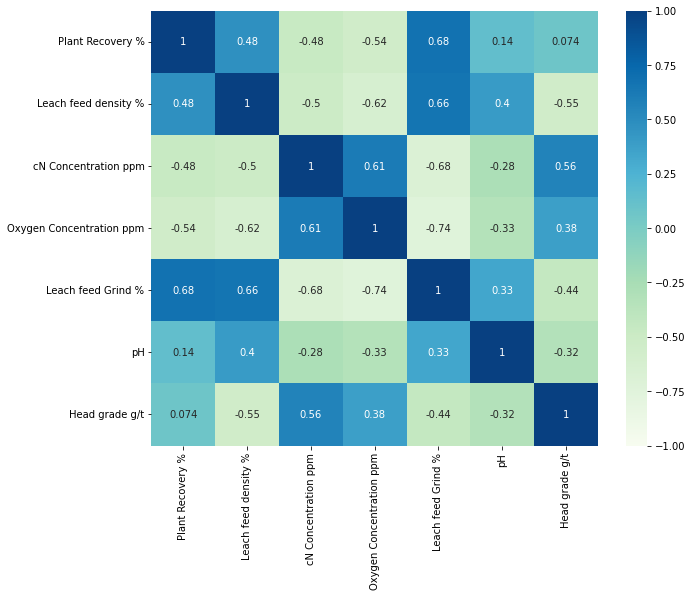

In [6]:
corr = data.corr()
plt.figure(figsize = [10, 8])

sns.heatmap(corr,cmap='GnBu',vmin = -1,vmax = 1, annot=True)

**Observations from correlation matrix**											
Recovery has an inverse relationship with both CN and O concentration										
Pulp/leach feed density have an inverse relationship with both CN and O concentration										
CN and O2 concentration have an inverse relationship with grind/ percentage passing a particular screen						
CN and O2 concentration have an inverse relationship with pH											
Grind has an inverse relationship with grade, weak relationship											
Grade also has an inverse relationship with pH, very weak relationship											
Grind and pH have an inverse relationship with grade, weak relationship											
Pulp/leach feed density have an inverse relationship with grade											
The rest of the parameters have a direct relationship with recovery and with each other	



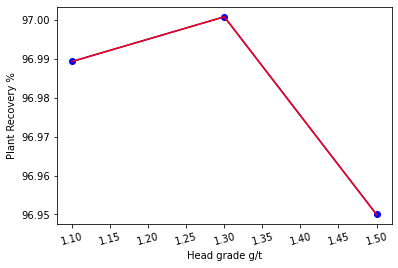

In [43]:
bin_edges = np.arange(0.4, 2+0.1, 0.2)
bin_centers = bin_edges[:-1]+0.1
## Cut the bin values into discrete intervals. Returns a Series object.
grade_binned = pd.cut(data['Head grade g/t'], bin_edges, include_lowest = True)

comb_mean = data['Plant Recovery %'].groupby(grade_binned).mean()
comb_std = data['Plant Recovery %'].groupby(grade_binned).std()
plt.errorbar(x=bin_centers, y=comb_mean, color='r')
plt.plot(bin_centers, comb_mean, color='b', marker='o', linestyle='-', label='Mean Line')
plt.xticks(rotation=15);
plt.ylabel('Plant Recovery %');
plt.xlabel('Head grade g/t');

The scenario where head grade shows an initial increase and then a decrease in correlation with gold recovery can be influenced by several factors. Here are some intelligent reasons that might contribute to this pattern:

**1:Optimal Processing Conditions:**
Initially, as the head grade increases, there might be an improvement in gold recovery, reflecting the efficient processing of higher-grade ore. However, beyond a certain point, the processing system might face challenges in handling extremely high-grade ore, leading to a decline in recovery.

**2:Metallurgical Complexity:**
High-grade ores can have complex mineralogical compositions. At moderate head grades, the processing plant might effectively recover gold from the simpler mineralogy. However, extremely high-grade ores may introduce metallurgical complexities, affecting recovery efficiency.

**3:Equipment Limitations:**
The processing equipment may have optimal operating conditions within a specific head grade range. Beyond this range, equipment limitations may result in diminishing returns or reduced efficiency, impacting gold recovery.

C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


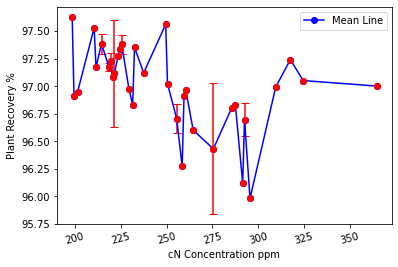

In [31]:
# Define bin edges and centers based on the specified range
bin_edges = np.arange(170, 370, 1)  # Adjust bin width as needed
bin_centers = bin_edges[:-1] + 0.5  # Adjust bin center calculation based on bin width

# Cut the bin values for the 'Oxygen Concentration ppm' variable
binned = pd.cut(data['cN Concentration ppm'], bin_edges, include_lowest=True)

# Remove empty bins
binned_counts = data.groupby(binned).size()
non_empty_bins = binned_counts[binned_counts > 0].index

# Calculate mean and std for non-empty bins
comb_mean = data['Plant Recovery %'].groupby(binned).mean().loc[non_empty_bins]
comb_std = data['Plant Recovery %'].groupby(binned).std().loc[non_empty_bins]

# Ensure 'comb_mean' and 'bin_centers' have the same size
non_empty_bin_centers = bin_centers[binned_counts > 0]

# Plot with error bars
plt.errorbar(x=non_empty_bin_centers, y=comb_mean,yerr=comb_std, color='r', fmt='o', capsize=4)
# Add a line through the mean points
plt.plot(non_empty_bin_centers, comb_mean, color='b', marker='o', linestyle='-', label='Mean Line')

plt.xticks(rotation=15)
plt.ylabel('Plant Recovery %')
plt.xlabel('cN Concentration ppm')

# Add legend
plt.legend()
# Show the plot
plt.show()

This plot suggests a moderate negative linear relationship between cyanide concentration and gold recovery. Here are some potential engineering reasons for this trend in the context of gold processing:

**1:Optimal Cyanide Concentration:**

There is an optimal range for cyanide concentration in gold processing. Too low or too high cyanide concentrations can negatively impact gold recovery. The negative correlation could imply that as cyanide concentration increases beyond the optimal range, gold recovery tends to decrease.

**2:Cyanide Complex Formation:**

Cyanide forms complexes with gold ions to facilitate their dissolution. However, excessive cyanide concentration may lead to the formation of non-productive complexes or interfere with other aspects of the gold recovery process, reducing overall efficiency.
For example, the dicyanoaurate(I) complex ($ \text{Au(CN)}_2^- $) is more stable than some other possible complexes, like $ \text{Au(CN)}_3^- $. If excess cyanide is present, it may lead to the formation of less stable complexes that are less favorable for gold recovery.



C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


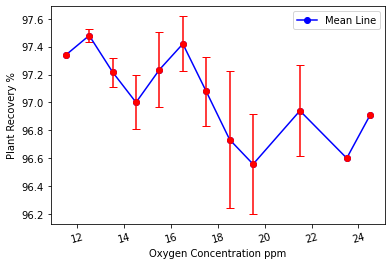

In [9]:
# Define bin edges and centers based on the specified range
bin_edges = np.arange(10, 26, 1)  # Adjust bin width as needed
bin_centers = bin_edges[:-1] + 0.5  # Adjust bin center calculation based on bin width

# Cut the bin values for the 'Oxygen Concentration ppm' variable
binned = pd.cut(data['Oxygen Concentration ppm'], bin_edges, include_lowest=True)

# Remove empty bins
binned_counts = data.groupby(binned).size()
non_empty_bins = binned_counts[binned_counts > 0].index

# Calculate mean and std for non-empty bins
comb_mean = data['Plant Recovery %'].groupby(binned).mean().loc[non_empty_bins]
comb_std = data['Plant Recovery %'].groupby(binned).std().loc[non_empty_bins]

# Ensure 'comb_mean' and 'bin_centers' have the same size
non_empty_bin_centers = bin_centers[binned_counts > 0]

# Plot with error bars
plt.errorbar(x=non_empty_bin_centers, y=comb_mean,yerr=comb_std, color='r', fmt='o', capsize=4)
# Add a line through the mean points
plt.plot(non_empty_bin_centers, comb_mean, color='b', marker='o', linestyle='-', label='Mean Line')

plt.xticks(rotation=15)
plt.ylabel('Plant Recovery %')
plt.xlabel('Oxygen Concentration ppm')

# Add legend
plt.legend()
# Show the plot
plt.show()

The observed correlation indicate that increasing oxygen concentration is associated with lower gold recovery, several factors could contribute to this negative relationship:

**1:Over-Oxidation Effects:**
Excessive oxygen levels might lead to over-oxidation, causing adverse effects on the gold recovery process. This could result in the formation of undesirable by-products or the breakdown of desired gold complexes Au(CN2-), While oxygen is essential for the oxidation of gold and the formation of soluble gold cyanide complexes, excessive amounts can lead to side reactions that produce less soluble species reducing overall recovery.
$$
2\text{Au(CN)}_2^- + \text{O}_2 + 2\text{H}_2\text{O} \rightarrow 2\text{Au(OH)}_4^- + 4\text{CN}^-
$$
**2:Process Optimization:**
The gold recovery process may have been optimized for a specific range of oxygen concentrations. Deviating from this optimal range could lead to suboptimal conditions and reduced recovery. It's possible that the process is less efficient at extreme oxygen levels.

**3:Oxygen Availability to Reactive Sites:**
High oxygen concentrations may saturate reactive sites or complexes in the leaching solution, limiting the availability of oxygen for critical reactions with gold. This saturation effect could contribute to the observed negative correlation.
Dissolved Oxygen and pH Interaction:

The interaction between dissolved oxygen and pH levels in the solution can influence gold recovery. Changes in oxygen concentration might coincide with changes in pH, impacting the overall efficiency of the recovery process.



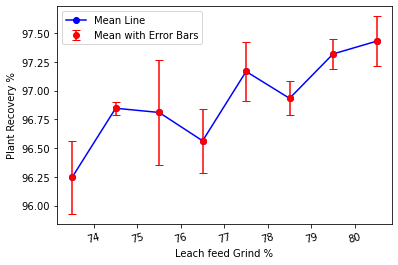

In [60]:
# Define bin edges and centers based on the specified range
bin_edges_grind = np.arange(72, 82, 1)  # Adjust bin width as needed
bin_centers_grind = bin_edges_grind[:-1] + 0.5  # Adjust bin center calculation based on bin width

# Cut the bin values for the 'Leach feed Grind %' variable
binned_grind = pd.cut(data['Leach feed Grind %'], bin_edges_grind, include_lowest=True)

# Remove empty bins
binned_counts_grind = data.groupby(binned_grind).size()
non_empty_bins_grind = binned_counts_grind[binned_counts_grind > 0].index

# Calculate mean and std for non-empty bins
comb_mean_grind = data['Plant Recovery %'].groupby(binned_grind).mean().loc[non_empty_bins_grind]
comb_std_grind = data['Plant Recovery %'].groupby(binned_grind).std().loc[non_empty_bins_grind]

# Ensure 'comb_mean_grind' and 'bin_centers_grind' have the same size
non_empty_bin_centers_grind = bin_centers_grind[binned_counts_grind > 0]

# Plot with error bars
plt.errorbar(x=non_empty_bin_centers_grind, y=comb_mean_grind, yerr=comb_std_grind, color='r', fmt='o', capsize=4, label='Mean with Error Bars')

# Add a line through the mean points
plt.plot(non_empty_bin_centers_grind, comb_mean_grind, color='b', marker='o', linestyle='-', label='Mean Line')

plt.xticks(rotation=15)
plt.ylabel('Plant Recovery %')
plt.xlabel('Leach feed Grind %')

# Add legend
plt.legend()

# Show the plot
plt.show()

The increase in gold recovery with finer particle size of milled ore is often associated with several key factors in the context of mineral processing, particularly in the case of gold extraction from ore through methods like cyanidation. Here is the most likely reason why finer particle size can lead to higher gold recovery:

**1.Increased Surface Area:**
 Finer particle sizes result in a larger surface area for the ore particles. This increased surface area exposes more of the gold-bearing minerals to the leaching solution (usually a cyanide solution in gold processing), enhancing the contact between the gold and the leach solution.



It's important to note that the optimum particle size for gold recovery can vary depending on the specific characteristics of the ore and the processing method employed. Too fine a particle size may lead to issues such as increased reagent consumption or difficulty in downstream processing. Therefore, the particle size is often optimized based on the specific ore characteristics and the processing circuit design.

# Principal Components Analysis

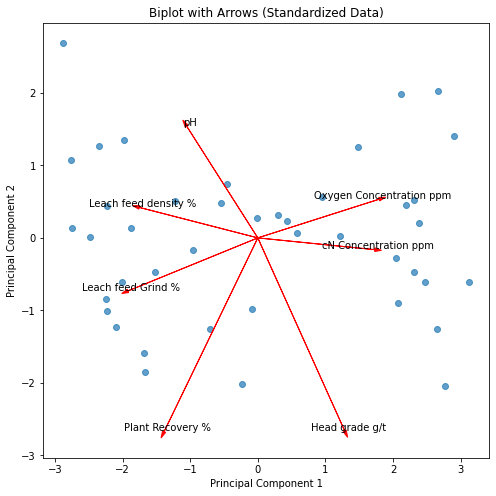

In [32]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Fit PCA using scikit-learn on standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)
# Create a biplot with longer arrows
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)

# Plot arrows with increased length representing variable loadings
arrow_length = 4.2  # Adjust the arrow length as needed
for i, (comp1, comp2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    ax.arrow(0, 0, arrow_length * comp1, arrow_length * comp2, head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.text(arrow_length * comp1 + 0.05, arrow_length * comp2 + 0.05, data.columns[i], color='black', ha='center', va='center')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Biplot with Arrows (Standardized Data)')

plt.show()

In [30]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the eigenvectors (variable loadings)
eigenvectors_df = pd.DataFrame(data=pca.components_.T[:, :3], columns=[f'PC{i+1}' for i in range(3)], index=data.columns)
# Set values below 0.3 to NaN
eigenvectors_df[eigenvectors_df.abs() < 0.3] = np.nan
eigenvectors_df.fillna(0,inplace=True)
# Display the DataFrame
print(eigenvectors_df)

                               PC1       PC2       PC3
Plant Recovery %         -0.329762 -0.636376  0.000000
Leach feed density %     -0.417227  0.000000  0.000000
cN Concentration ppm      0.411725  0.000000  0.337773
Oxygen Concentration ppm  0.427148  0.000000  0.000000
Leach feed Grind %       -0.456962  0.000000  0.000000
pH                        0.000000  0.367469  0.848588
Head grade g/t            0.305849 -0.633996  0.373544


**Let's interpret the loadings and the biplot with respect to the original variables:**

1. **Plant Recovery % (Dependent Variable):**
   
   - PC1: Associated with lower Plant Recovery %. Factors loading strongly on PC1, such as lower leach feed density, higher cN Concentration, higher Oxygen Concentration, lower leach feed grind, and higher head grade, are linked to lower recovery.
   
   - PC2: Strongly linked to lower recovery, especially when head is lower and pH is higher.
   

2. **Leach feed density %:**
   - PC1: Lower leach feed density is associated with lower recovery. PC1 captures a general adverse effect on recovery related to lower leach feed density.
   
3. **cN Concentration ppm:**
   - PC1: Higher cN Concentration is linked to lower recovery. PC1 captures the negative effect of cN Concentration on recovery.
   

4. **Oxygen Concentration ppm:**
   - PC1: Higher Oxygen Concentration is associated with lower recovery. PC1 captures the negative effect of Oxygen Concentration on recovery.
  

5. **Leach feed Grind %:**
   - PC1: Lower leach feed grind is linked to lower recovery. PC1 captures the adverse effect of lower grind on recovery.
  

6. **pH:**
   - PC2: Higher pH is positively associated with lower recovery. PC2 captures the adverse effect of higher pH on recovery.
   

7. **Head grade g/t:**
   - PC1: Higher head grade is linked to lower recovery. PC1 captures the negative effect of head grade on recovery.
   - PC2: Lower head grade is associated with lower recovery. PC2 captures the  effect of lower head grade on recovery.
**Summary**:
PC1: Represents a general trend capturing factors that adversely affect recovery, such as lower leach feed density, higher cN Concentration, higher Oxygen Concentration, lower leach feed grind, and higher head grade.
PC2: Indicates a specific relationship where lower head grade, and higher pH are associated with lower recovery.

Keep in mind that these interpretations are based on the loadings of the principal components and the assumption of linear relationships. Domain expertise is crucial for a comprehensive understanding of the mineral processing system.

# PLANT OPTIMISATION


## Executive Summary

This report provides key engineering insights and recommendations for optimizing the operation of the gold processing plant. The analysis includes observations from the correlation matrix, descriptive statistics, and practical considerations for achieving efficient gold recovery. The following recommendations are based on a comprehensive understanding of the relationships between process parameters and recovery efficiency.

## Key Recommendations

### 1. Optimal Cyanide Concentration

- **Maintain within Range:** Ensure that cyanide concentration is within the optimal range (200 to 230 ppm) to achieve efficient gold recovery.
- **Balancing Act:** Monitor the correlation between cyanide concentration and gold recovery, striking a balance to avoid excessive consumption without compromising recovery.

### 2. Particle Size Optimization

- **Fine-Tune Milling:** Optimize the milling process to achieve an optimal particle size (80% passing 106 microns) for enhanced gold recovery.
- **Surface Area Advantage:** Leverage the increased surface area from finer particles for improved leaching efficiency.

### 3. Leach Feed Density Management

- **Optimize Density:** Fine-tune leach feed density (56% to 58% solids by weight) to maintain an efficient leaching environment.
- **Avoid Dilution:** Monitor the inverse relationship between leach feed density and cyanide/oxygen concentrations to prevent adverse effects on recovery.

### 4. pH Control

- **Maintain Optimal pH:** Ensure that pH is within the optimal range (10 to 10.5) for favorable conditions in gold recovery.
- **pH Control Strategies:** Implement pH control strategies to counter the observed inverse relationship between pH and recovery.

### 5. Grinding Process Optimization

- **Fine-Tune Grinding:** Optimize the grinding process to achieve an optimal leach feed grind percentage.
- **Efficiency and Energy:** Aim for a grind that maximizes gold recovery without introducing inefficiencies or excessive energy consumption.

### 6. Head Grade Considerations

- **Threshold Analysis:** Be cautious of the observed initial increase and subsequent decrease in correlation between head grade and gold recovery.
- **Optimize Within Range:** Conduct further analysis to identify the threshold point for head grade optimization.

### 7. Comprehensive Monitoring

- **Real-time Data:** Implement a comprehensive monitoring system for real-time tracking of key parameters.
- **Dynamic Adjustments:** Utilize real-time data to make dynamic adjustments to plant operations.

### 8. Environmental and Cost Considerations

- **Regulatory Compliance:** Ensure operational parameters align with environmental regulatory requirements.
- **Cost-Effectiveness:** Optimize operations with a focus on cost-effective processes.

## Optimal Ranges

- **Cyanide Concentration:** 200 to 230 ppm
- **Particle Size (Grind Percentage):** 80% passing 106 microns
- **Leach Feed Density:** 56% to 58% solids by weight
- **pH:** 10 to 10.5
- **Head Grade:** Analyze ore characteristics to determine an optimal range.

## Conclusion

These recommendations serve as a guideline for optimizing gold recovery while considering operational efficiency, cost-effectiveness, and environmental sustainability. Process engineers and metallurgists should be engaged to implement these recommendations effectively and continually evaluate plant performance for ongoing optimization.

---



---
**Author:** Louis Ziemah
